<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análisis de experimentos
</h1>


# <font color='red' style='font-size: 30px;'> Introducción al análisis de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Insertando el experimento en un Dataframe </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando las bibliotecas

### Pandas

https://pandas.pydata.org/

In [9]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [10]:
import numpy as np

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Pruebas realizadas en forma normalizada</b></font></p>








<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construyendo una matriz representando todas las pruebas realizadas:


In [11]:
pruebas = np.array([[-1, -1],[1,-1],[-1,1],[+1,+1]])
pruebas

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

### pyDOE2

https://pypi.org/project/pyDOE2/


La biblioteca **pyDOE2** en Python se utiliza para generar y gestionar diseños de experimentos (DOE, por sus siglas en inglés), una técnica estadística clave en la investigación, optimización y análisis de procesos. Permite crear diseños experimentales de manera eficiente, como diseños factoriales, diseños de respuesta a superficies (RSM) como los de Box-Behnken y Central Composite, y diseños latinos, los cuales ayudan a explorar cómo las variables de entrada afectan a los resultados de un sistema con el mínimo número de experimentos. Esta capacidad de generar experimentos balanceados y optimizados facilita la reducción de costos y tiempos en pruebas, al mismo tiempo que maximiza la información obtenida, lo cual es crucial para la optimización de parámetros y procesos en diversos campos como la ingeniería, la manufactura y la investigación científica.

In [12]:
#!pip install pyDOE2
import pyDOE2 as doe

## Construyendo un diseño factorial de 2²


In [13]:
pruebas = doe.ff2n(2) #función factorial de dos niveles elevado al cuadrado 'ff2n(2)'

In [14]:
#Devualve una matriz 2x2
pruebas

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Insertando el diseño en un Dataframe

In [15]:
#convertimos a DataFrame
experiemento = pd.DataFrame(pruebas, columns=['Harina', 'Leche'])

In [16]:
experiemento

,Harina,Leche
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Insertando la columna con los resultados

In [17]:
#Añadimos otra columna con los resulados obtenidos en el Análisis Factorial
experiemento['Cantidades']= [19,37,24,49]

In [18]:
experiemento

,Harina,Leche,Cantidades
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusión:</b> Finalmente tenemos nuestro experimento representado por un <i>Dataframe</i> de Pandas. Usaremos este <i>Dataframe</i> para comenzar el análisis de nuestro experimento.
<hr>   

# <font color = 'purple'> Analizando gráficamente el experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando Seaborn

- Definimos la paleta de colores y el estilo del gráfico
- En la galería de documentación de la biblioteca Seaborn se puede observar la variedad de gráficos que se pueden crear.

https://seaborn.pydata.org

In [19]:
import seaborn as sns

In [20]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para la Harina

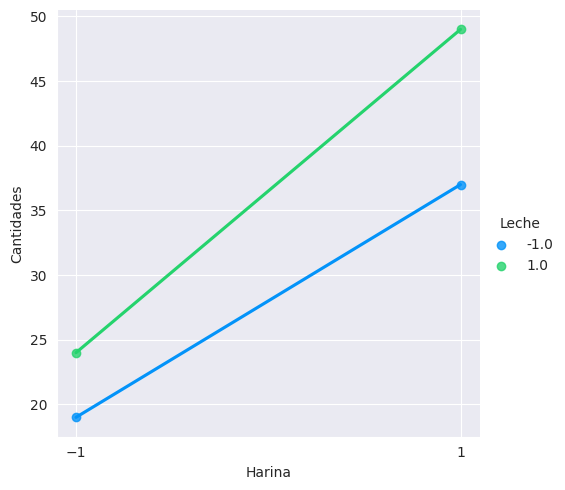

In [21]:
#Como influye la Harina sobre la Leche
ax1= sns.lmplot(data= experiemento, x='Harina', y='Cantidades', ci= None, hue='Leche')
ax1.set(xticks=(-1,1))#Visualizamos solo los puntos -1 y 1

- Al pasar del nivel inferior hacia el nivel superior de la cantidad de leche, la pendiente de la línea que se muestra en el gráfico aumenta. A partir de esta observación, podemos plantear la hipótesis de que probablemente exista un efecto de interacción entre la harina y la leche.
- Cuando pasamos del nivel inferior al superior de la cantidad de harina, el número de cupcakes aumenta. Esta observación se mantiene independientemente de la cantidad de leche utilizada. Entonces podemos decir que la harina tiene un efecto positivo en la cantidad de cupcakes producidos.

### Para la Leche

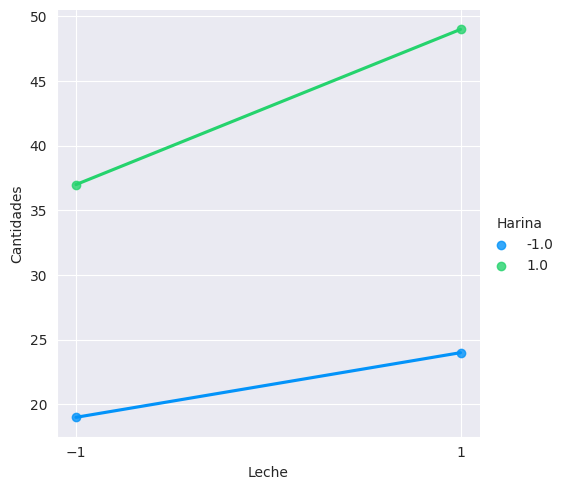

In [22]:
#Como influye la Leche sobre la Harina
ax1= sns.lmplot(data= experiemento, x='Leche', y='Cantidades', ci= None, hue='Harina')
ax1.set(xticks=(-1,1))#Visualizamos solo los puntos -1 y 1

Los 2 gráficos permiten comprobar la influencia de la Harina sobre la Leche y de la Leche sobre la Harina. Sin embargo los angulos son diferentes, en el primer gráfico en angulo de inclinación es mayor en cada recta por lo que se puede concluir que la Harina tiene una mayor influencia sobre la leche.


# <font color = 'purple'> Ajustando el modelo estadístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

### Bibliotecas  Stats Model


In [23]:
# P= B0 + B1 * Xharina + B2 * Yleche + B3 * Xharina * Yleche + e
import statsmodels.api as sm
import statsmodels.formula.api as smf

### .

In [24]:
# Generamos el Modelo Estadístico
modelo= smf.ols(data= experiemento, formula= 'Cantidades ~ Harina + Leche + Harina:Leche') # Con 'Harina:Leche se analiza la interacción de las variables

In [25]:
# Ajustamos el modelo para calcular los coeficientes
modelo_ajustado = modelo.fit()

In [26]:
#Observamos los resultados
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 23 Dec 2024   Prob (F-statistic):                nan
Time:                        19:54:35   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       32.2500        nan        nan   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw =

Analizamos los siguientes parámetros:

- B0 (Intercepto): corresponde al promedio de la variable cantidades
- B1: Representa la importancia de la Harina en el Modelo
- B2: Representa la importancia de la Leche en el Modelo
- B3: Representa la interacción entre la Harina y la Leche

Se propuso el siguiente modelo estadístico para representar el experimento:

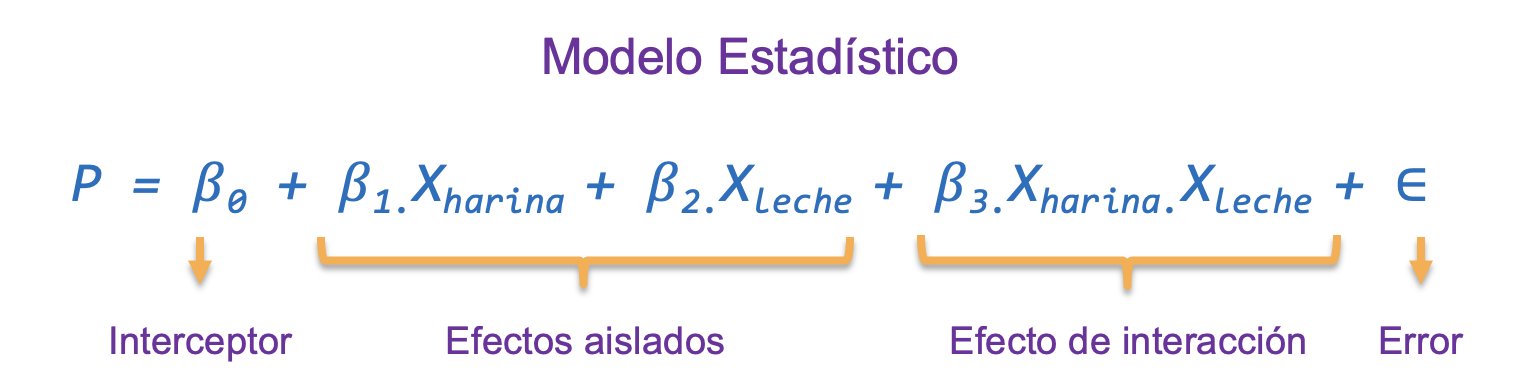



Aprendimos a:

- Insertar los datos experimentales en un Dataframe de pandas;
- Usar la biblioteca pyDOE2 para generar diseños factoriales;
- Hacer análisis gráficas preliminares del experimento;
- Proponer un modelo estadístico;
- Ajustar el modelo estadístico a los datos experimentales utilizando StatsModel.

# ANÁLISIS ESTADÍSTICO

# <font color = 'purple'> Aumentando los Grados de libertad  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


El **grado de libertad residual (GLR)** es un concepto fundamental en el análisis de varianza (ANOVA) y en la regresión estadística, que representa la cantidad de variabilidad en los datos que no es explicada por el modelo. Se calcula como la diferencia entre el número total de observaciones y el número de parámetros ajustados por el modelo, incluyendo los coeficientes de la regresión y el término de intersección. El GLR es esencial para evaluar la precisión del modelo, ya que refleja la variabilidad no explicada por las variables independientes. En las pruebas de hipótesis, el GLR se utiliza para calcular la estadística F, permitiendo comparar la variabilidad explicada por el modelo con la no explicada y, de esta forma, determinar la calidad y el ajuste del modelo a los datos. En resumen, el GLR es crucial para evaluar el desempeño de los modelos estadísticos, ya que permite comprender cuánta información aún queda sin explicar.

El GLR es calculado de la sigueinte forma:
 - n = número de pruebas
 - p = número de parámetros
 - GLR = n - p

En este caso:
- GLR = 4 - 4 = 0

Esto quiere dicir que los parámetros del módelo y la cantidad de experimentos no son sufucientes para poder generar un análisis de significacnia estadística, po rlo que se requieren más pruebas o líneas de experimentos. con el fín de obtener un GLR > 0

<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Réplicas en el centro</b>

<p style='margin: 30px 30px;'>
    
    

    

    
<hr>    

Adicionamos más valores

In [27]:
centro = np.array([
                   [0,0,29],
                   [0,0,30],
                   [0,0,29],
                   [0,0,30]
                   ])

In [28]:
#convertimos a DataFrame
centro_dataframe = pd.DataFrame(centro, columns=['Harina', 'Leche', 'Cantidades'], index=[4,5,6,7])

In [29]:
centro_dataframe

,Harina,Leche,Cantidades
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [30]:
# Juntamos los dos DataFrames
experiemento = pd.concat([experiemento, centro_dataframe])

In [31]:
experiemento

,Harina,Leche,Cantidades
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análisis de significancia estadística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [32]:
# Generamos el Modelo Estadístico
modelo= smf.ols(data= experiemento, formula= 'Cantidades ~ Harina + Leche + Harina:Leche') # Con 'Harina:Leche se analiza la interacción de las variables

In [33]:
# Ajustamos el modelo para calcular los coeficientes
modelo_ajustado = modelo.fit()

In [34]:
#Observamos los resultados
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 23 Dec 2024   Prob (F-statistic):            0.00152
Time:                        19:54:35   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.8750      0.710     43.494   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


Con base en los resultados obtenidos, es posible realizar un análisis de significancia estadística observando los valores de **P>|t|**. Los parámetros **Intercepto**, **Harina** y **Leche** se consideran estadísticamente significativos, ya que sus valores de p son menores a 0.05 (o 5%), lo que indica que su efecto es relevante en el modelo. En particular, el valor de p para el **Intercepto** es 0.000, para **Harina** es 0.000 y para **Leche** es 0.013, todos ellos por debajo del umbral de 0.05. En cambio, el término de interacción **Harina:Leche** no es significativo, ya que su valor de p es 0.156, lo cual es mayor a 0.05, lo que sugiere que su impacto en el modelo no es estadísticamente relevante.


# <font color = 'purple'> Prueba de significación estadística usando <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





In [35]:
# Extraemos los valores de los parámetros del módelo
t_valores = modelo_ajustado.tvalues

In [36]:
t_valores

,0
Intercept,43.494275
Harina,10.708252
Leche,4.233495
Harina:Leche,1.743204


In [37]:
# Extraemos los nombres de los parámetros del módelo y los guardamos en una lista con la función tolist()
nombre = t_valores.index.tolist()

In [38]:
nombre

['Intercept', 'Harina', 'Leche', 'Harina:Leche']

### .

In [39]:
#Generamos el t tabulado
from scipy import stats

In [40]:
distribucion = stats.t(df = 4) # Los Grados de liberta residual son 4 por eso: 'df = 4'

In [41]:
distribucion.ppf(q =1-0.025 ) #100% - 2.5%, Este es el valor del t Tabulado

2.7764451051977987

In [42]:
#Graficamos t Tabulado
limite = [distribucion.ppf(q =1-0.025 )]* len(nombre)

In [43]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### .


Text(0.5, 0, 't_valores')

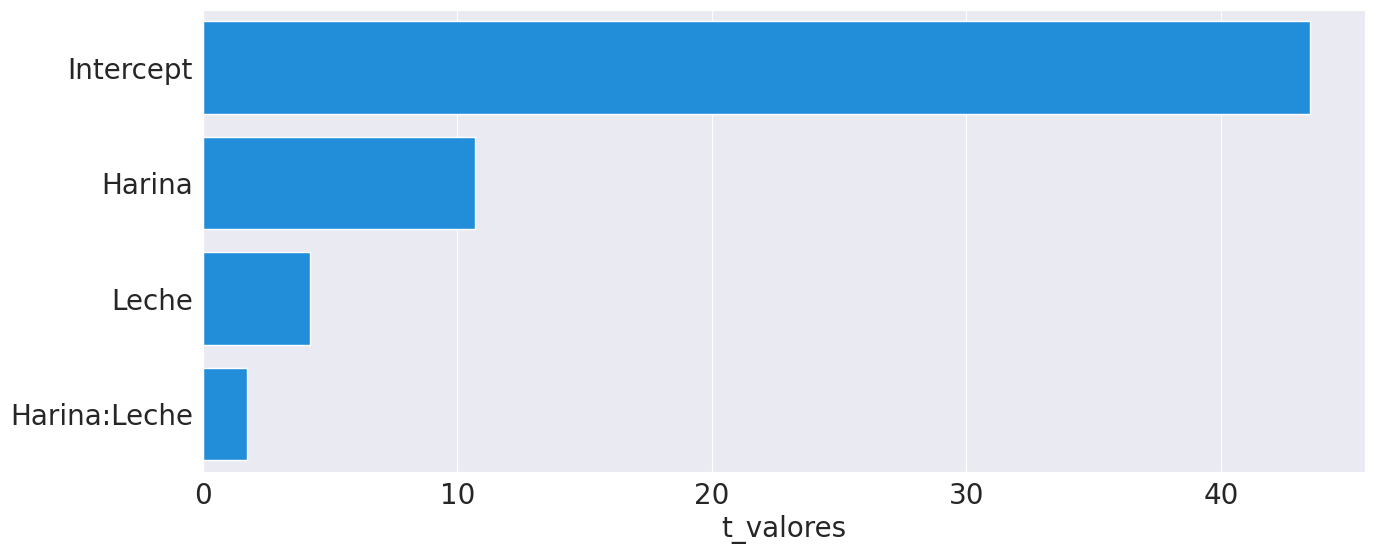

In [44]:
#Gráficar el T Calculado para cada uno de los parámetros
pareto = sns.barplot(x= t_valores, y= nombre)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t_valores', fontsize=20)

El t Calculado de los parámetros esta en barras y el t Tabulado se representa por la línea vertical roja.
Se observa que para los parámetros Intercepto, Harina, Leche el t Calculado es Mayor que el t Tabulado. Esto significa que las variables son significativas
Mientras que para el parámetro Harina:Leche Leche el t Calculado es Menor que el t Tabulado. Estos significa que esta variable no es significativa en la explicación del modelo, por lo que es recomendable eliminar esta variable.

Aprendimos:

- El significado de los grados de libertad;
- Calcular los grados de libertad de los residuos;
- Realizar el análisis de significación estadística de los parámetros del modelo;
- Construir e interpretar un diagrama de Pareto normalizado.

# ACTUALIZANDO LOS ANÁLISIS

### Plotando el gráfico

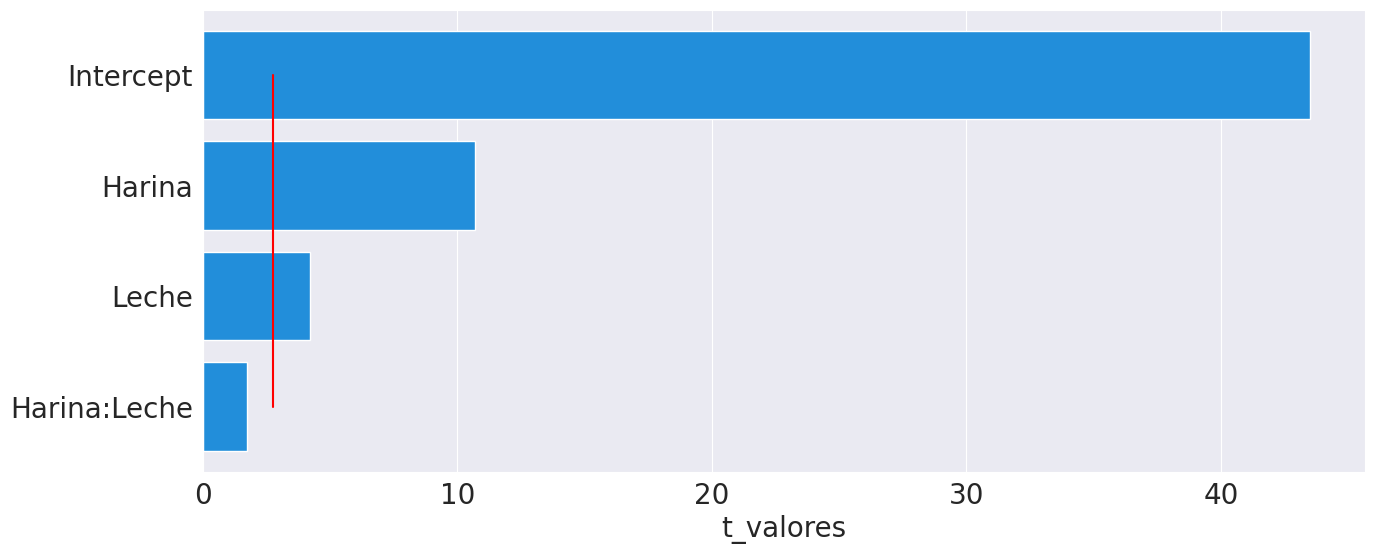

In [45]:
#Gráficar el T Calculado  y t Tabulado
pareto = sns.barplot(x= t_valores, y= nombre)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t_valores', fontsize=20)
pareto.plot(limite, nombre, color = 'red')

# <font color = 'purple'> Proponiendo un nuevo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [47]:
# Generamos el Modelo Estadístico
modelo_2 = smf.ols(data= experiemento, formula= 'Cantidades ~ Harina + Leche')

In [50]:
#Generamos los coeficientes
modelo_2_ajustado = modelo_2.fit()

In [57]:
#Mostramos los resultados
print(modelo_2_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           0.000571
Time:                        20:05:26   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


Ahora contamos con 5 grados de libertad tras eliminar la interacción entre la Harina y la Leche. Además, el modelo  las variables Intercepto, Harina y Leche como resultan ser Estadisticamente significativas dado que su p valor < 5%. incluso para la variable leche cuyo p valor es del 1.6%. En conclusión es posible utilizar este modelo estadístico para generar predicciones.

<hr>

# <font color = 'purple'> Diagrama de Pareto estandarizado del nuevo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [54]:
#Extraemos los valores de  t Calculado del modelo 2
t_valores_2 = modelo_2_ajustado.tvalues

In [58]:
t_valores_2

,0
Intercept,36.658022
Harina,9.025173
Leche,3.568092


In [59]:
nombre_2 = t_valores_2.index.tolist()

In [60]:
nombre_2 # 'nombre_2' Ahora contiene 3 parámetros

['Intercept', 'Harina', 'Leche']

### .

In [61]:
distribucion_2 = stats.t(df = 5) # Los Grados de liberta residual son 5 por eso: 'df = 5'

In [62]:
distribucion_2.ppf(q =1-0.025 ) #100% - 2.5%, Este es el valor del t Tabulado

2.570581835636314

In [64]:
limite_2 = [distribucion_2.ppf(q =1-0.025 )]* len(nombre_2)
limite_2

[2.570581835636314, 2.570581835636314, 2.570581835636314]

### Plotando el gráfico

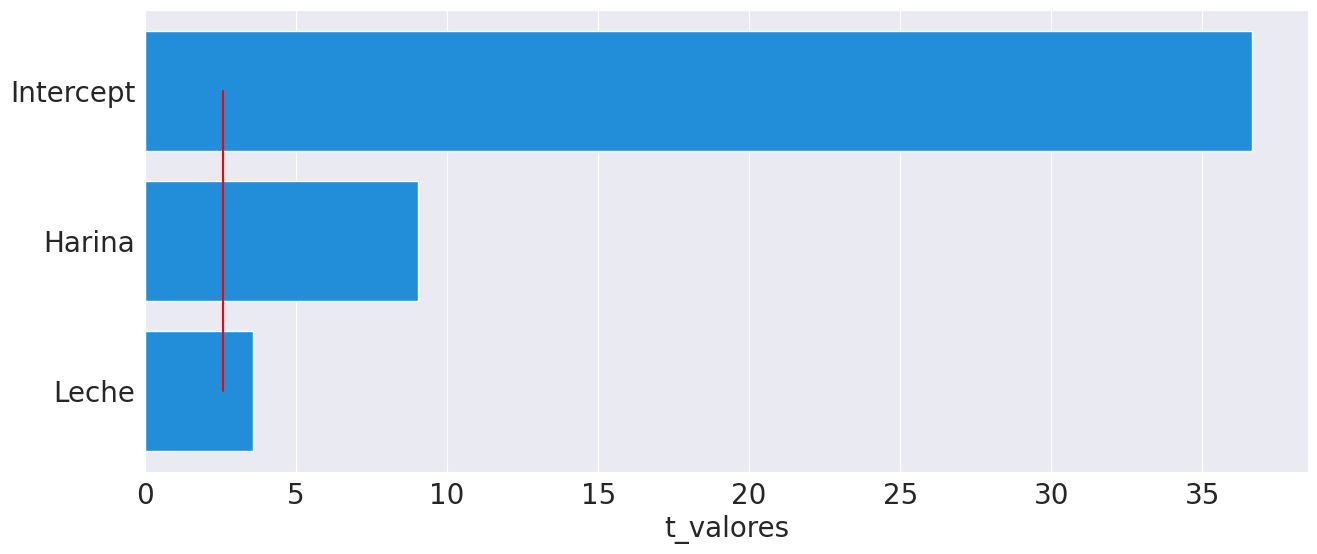

In [66]:
#Gráficar el T Calculado  y t Tabulado
pareto = sns.barplot(x= t_valores_2, y= nombre_2)
pareto.figure.set_size_inches(15, 6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t_valores', fontsize=20)
pareto.plot(limite_2, nombre_2, color = 'red')

<font color='red' style='font-size: 30px;'> Predichos por observados  </font>
<hr style='border: 2px solid red;'>

Graficamente es posible observar que el t calculado es mayor que el t tabulado ya que las variables Intercepto, Harina y Leche sobrepasan la línea vertical de color rojo que representa al t tabulado. por tanto, se concluye que estis parámetros son estadísticamente significativos al 5%

In [67]:
#Probamos el modelo
observados = experiemento['Cantidades']

In [69]:
#Cantidad de cupcakes que se obtuvieron en cada experimento
observados

,Cantidades
0,19
1,37
2,24
3,49
4,29
5,30
6,29
7,30


### .

In [71]:
#Generamos las predicciones del modelo con la función predict()
predichos = modelo_2_ajustado.predict()

In [73]:
predichos # Cantidad de cupcakes que el modelo piensa que vamos a obtener con nuestros datos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [74]:
import matplotlib.pyplot as plt

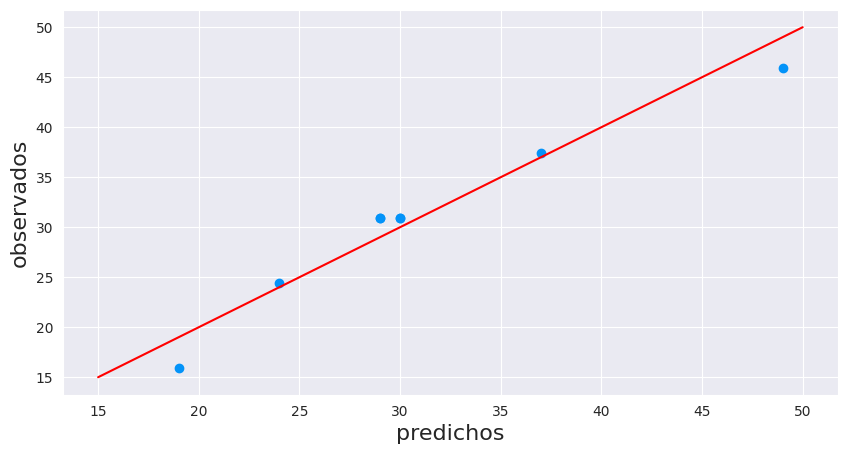

In [77]:
#Graficamos
plt.figure(figsize=(10, 5))
plt.xlabel('predichos', fontsize=16)
plt.ylabel('observados', fontsize=16)
plt.scatter(observados, predichos)# Comparamos las dos variables

#Trazamos una línea guía entre los puntos 15 y 50 en el eje X y Y
x= np.linspace(start=15, stop= 50, num=10)
y= np.linspace(start=15, stop= 50, num=10)
plt.plot(x, y,'r')

Dado que los puntos en azul estan cerca a la línea recta, significa que el modelo esta funcionando muy bien

<hr>

In [78]:
print(modelo_2_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:             Cantidades   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           0.000571
Time:                        20:35:57   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


El coeficiente de determinación R-squared indica que el módelo tiene una capacidad de ajuste del 95%


Aprendimos a:

- Actualizar las hipótesis iniciales a medida que se recopila nueva información;
- Proponer nuevos modelos para representar mejor la realidad de un experimento;
- Analizar un gráfico de predicho por observado para inferir la calidad de representatividad de un modelo;
- Relacionar el coeficiente de correlación R2 con la calidad del ajuste y con los resultados presentados por un gráfico de predicho por observado.



```
# Tiene formato de código

```

### .
#USANDO EL MODELO

# <font color = 'purple'> Explorando el modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [79]:
parametros = modelo_2_ajustado.params

In [80]:
parametros

,0
Intercept,30.875
Harina,10.750
Leche,4.250


### .

### Definiendo la función

In [81]:
def modelo_receta(x_h, x_l):
# Generamos los límites
    limite_normalizado =[-1, 1]
    limite_harina =[0.5, 1.5]
    limite_leche =[0.2, 0.7]

# Convertir e interpolar los datos de la harina y la leche
    x_h_convertido = np.interp(x_h, limite_harina, limite_normalizado)
    x_l_convertido = np.interp(x_l, limite_leche, limite_normalizado)

    cantidades = parametros['Intercept'] + parametros['Harina']*x_h_convertido + parametros['Leche']*x_l_convertido
    return round(cantidades)

In [83]:
#Probamos el mpodelo agregando valores númericos
modelo_receta(0.5, 0.2)

16

16 es el valor que el modelo consigue reproducir con los parámetros de entrada (0.5, 0.2). Es decir 16 es la cantidad de cupcakes predichos. pero en realidad se obtuvieron 19. Con la línea anterior, ya se puede saber que cantidad se puede obtener de cupcakes.


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'>


<hr>

# <font color = 'purple'> Mapa de colores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [84]:
x_harina = np.linspace(start=0.5, stop=1.5, num=10)
x_harina

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [85]:
x_leche = np.linspace(start=0.2, stop=0.7, num=10)
x_leche

array([0.2       , 0.25555556, 0.31111111, 0.36666667, 0.42222222,
       0.47777778, 0.53333333, 0.58888889, 0.64444444, 0.7       ])

### .

In [87]:
puntos = []
for cont1 in x_harina:
  temp= []
  for cont2 in x_leche:
    temp.append(modelo_receta(cont1, cont2))
  puntos.append(temp)

In [88]:
# Los valores en la variable puntos son las cantidades de cupcakes
puntos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construyendo la superficie de respuesta

In [90]:
# Importamos matplotlib con el método cm
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

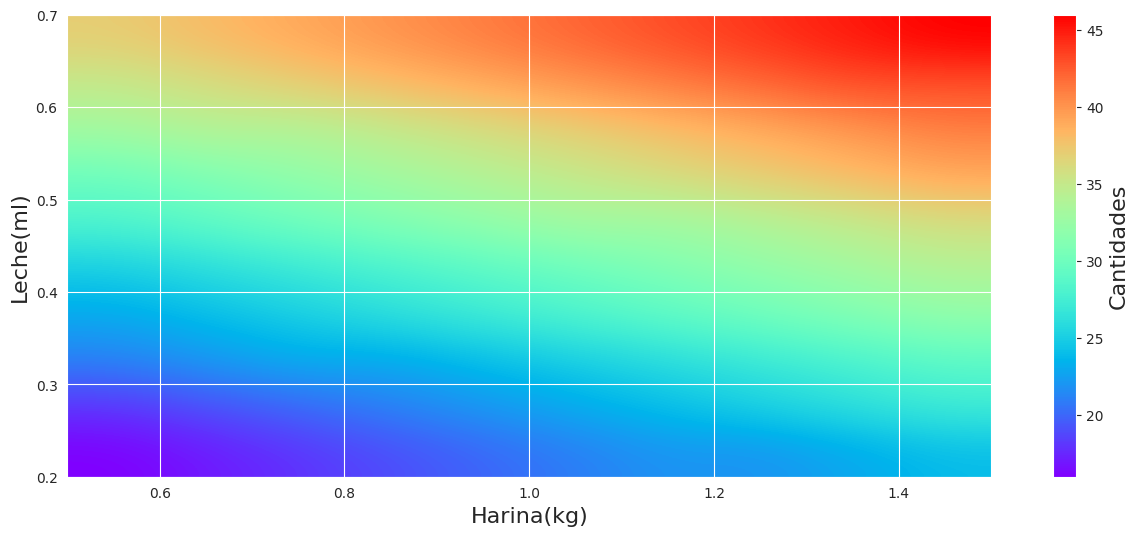

In [91]:
# Base
plt.figure(figsize=(16, 6))
plt.xlabel('Harina(kg)', fontsize = 16)
plt.ylabel('Leche(ml)', fontsize = 16)

# Mapa de Colores
mapa_colores = plt.imshow(puntos, origin ='lower', cmap= cm.rainbow, interpolation='quadric', extent=(0.5, 1.5, 0.2, 0.7))

#Barra de Colores
plt.colorbar().set_label('Cantidades', fontsize = 16)

Cuanto más rojo mayor cantidad de cupcakes se puede producir

### Usando Isolineas

<a list of 7 text.Text objects>

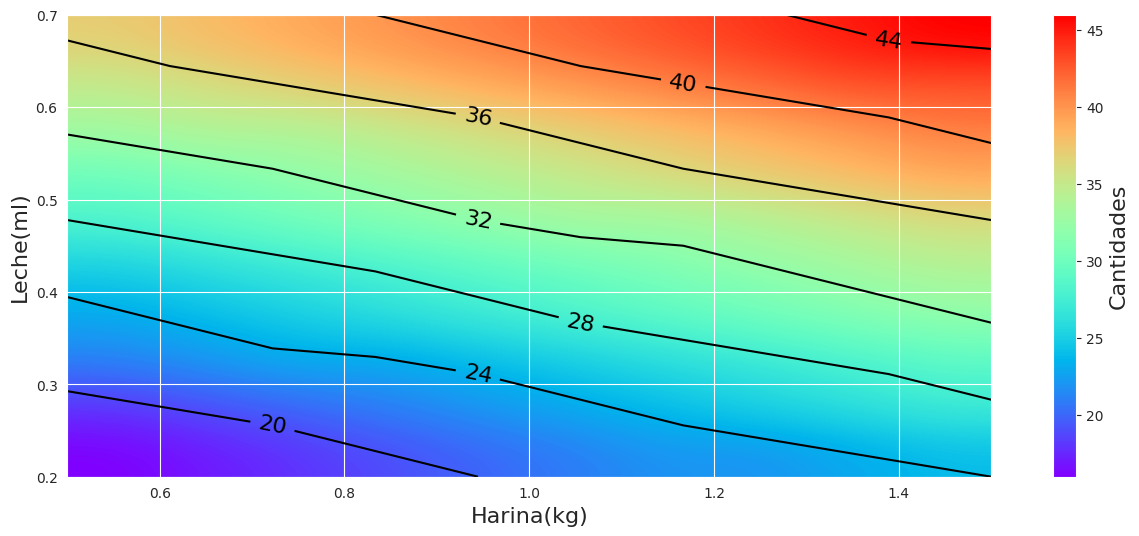

In [95]:
# Base
plt.figure(figsize=(16, 6))
plt.xlabel('Harina(kg)', fontsize = 16)
plt.ylabel('Leche(ml)', fontsize = 16)

# Mapa de Colores
mapa_colores = plt.imshow(puntos, origin ='lower', cmap= cm.rainbow, interpolation='quadric', extent=(0.5, 1.5, 0.2, 0.7))

# Barra de Colores
plt.colorbar().set_label('Cantidades', fontsize = 16)

# Isolineas
lineas = plt.contour(x_harina, x_leche, puntos,  colors='black', linewidths=1.5)
plt.clabel(lineas, inline=True, fontsize=16, fmt= '%1.0f', inline_spacing= 10) #Adicionamos los números entre las lineas para eso usamos 'inline=True'


El gráfico presenta un mapa de colores en el que cada línea recorre toda el área de experimentación, mostrando el número o cantidad de cupcakes obtenidos en función de las combinaciones de ingredientes. De esta manera, se facilita la toma de decisiones informadas. Por ejemplo, si el objetivo es producir 40 cupcakes, se pueden obtener mezclando 1 kg de harina con 0.65 ml de leche, pero también es posible alcanzar esa misma cantidad utilizando 1.2 kg de harina y 0.62 ml de leche. Así, para cada cantidad deseada de cupcakes, el gráfico muestra las diversas combinaciones de ingredientes necesarias para lograrla.

Aprendimos a:

- Utilizar el modelo ajustado para obtener informaciones sobre la receta;
- Diferenciar entre leyes estadísticas y leyes matemáticas;
- Construir e interpretar mapas de colores;
- Insertar líneas en los mapas de colores para facilitar la interpretación de los resultados.